# Synthetic Pebble generator

You will have to install the cudatoolkit. You can install this systemwide using the installer from your OS. 
**Make sure that your cudatoolkit is the same or compatible to your driver. You can use `nvidia-smi` or `nvcc --version` to identify your CUDA version. This is the driver version you will need to install.**

If you are using conda, you can install it via (likely you want a CUDA Toolkit 12.x or higher):
```bash
conda activate OrthoSAM
pip install cuda-python
conda install -c conda-forge cuda-nvcc cuda-nvrtc "cuda-version==12.4"
```

In [1]:
from synthetic_generator import generator, shadow_image_generator, noise_image_generator
import sys
sys.path.append("..")
from OrthoSAM import orthosam
from utility import setup, load_config
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
config = load_config()

## Generate a synthetic black&white pebble image with shadows. 

We set the radii between 10 and 1000 pixels

In [3]:
# generate B&W synthetic images
Dir=os.path.join(config['DataDIR'],'synthetic','synthetic_0010_1000_bw')
generator(Dir=Dir, min_radi=10, max_radi=3000
          , image_size=10000, num_circles=5000, max_attempts=100
          , overlap=False, ran_color=False, generate_dem=True
          )

**and show the images:**

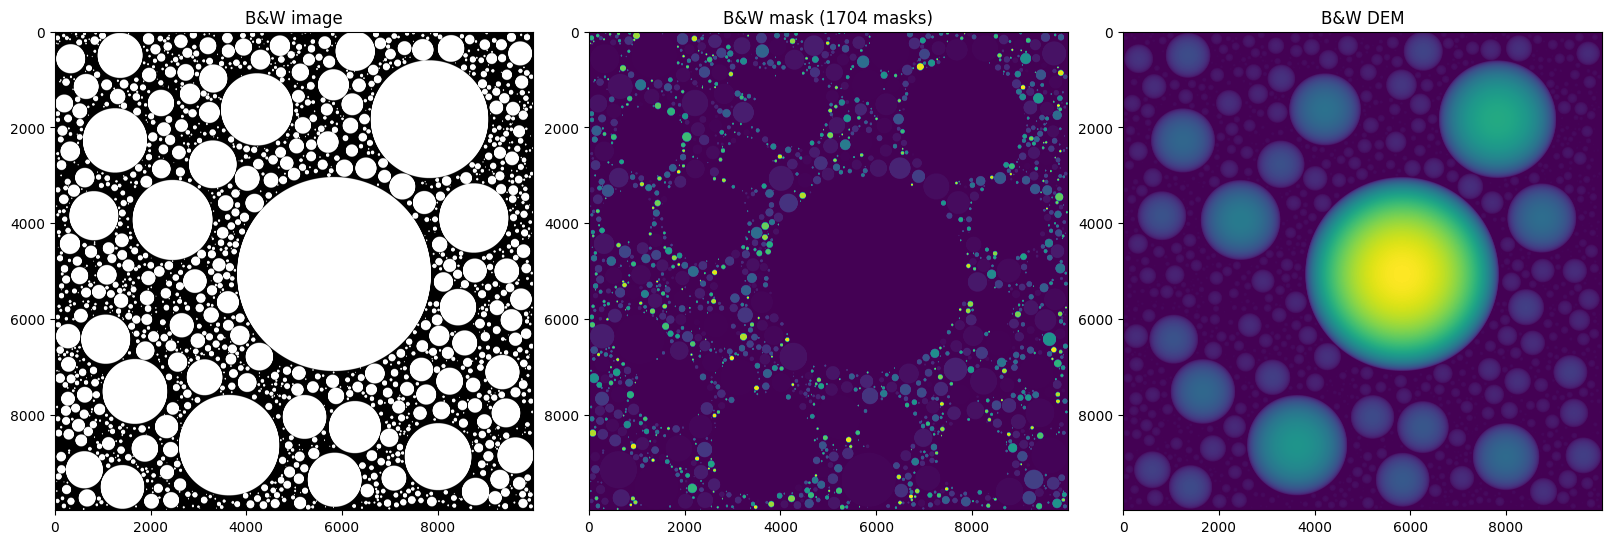

In [4]:
bw_img_fname = os.path.join(Dir, 'img.npy')
bw_img = np.load(bw_img_fname)
bw_msk_fname = os.path.join(Dir, 'msk.npy')
bw_msk = np.load(bw_msk_fname)
bw_dem_fname = os.path.join(Dir, 'dem.npy')
bw_dem = np.load(bw_dem_fname)

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16,9),
                        layout="constrained")
ax[0].imshow(bw_img)
ax[0].set_title('B&W image')
ax[1].imshow(bw_msk)
ax[1].set_title('B&W mask (%d masks)'%(len(np.unique(bw_msk)) - 1))
ax[2].imshow(bw_dem)
ax[2].set_title('B&W DEM')
fig.savefig('Black_and_white_synthetic_pebbles_0010_3000_bw.png', dpi=300)

## Generate a synthetic colored pebble image


In [5]:
# generate colored synthetic images
Dir=os.path.join(config['DataDIR'],'synthetic','synthetic_0010_3000_cl')
generator(Dir=Dir, min_radi=10, max_radi=3000
          , image_size=10000, num_circles=5000, max_attempts=100
          , overlap=False, ran_color=True, generate_dem=True
          )

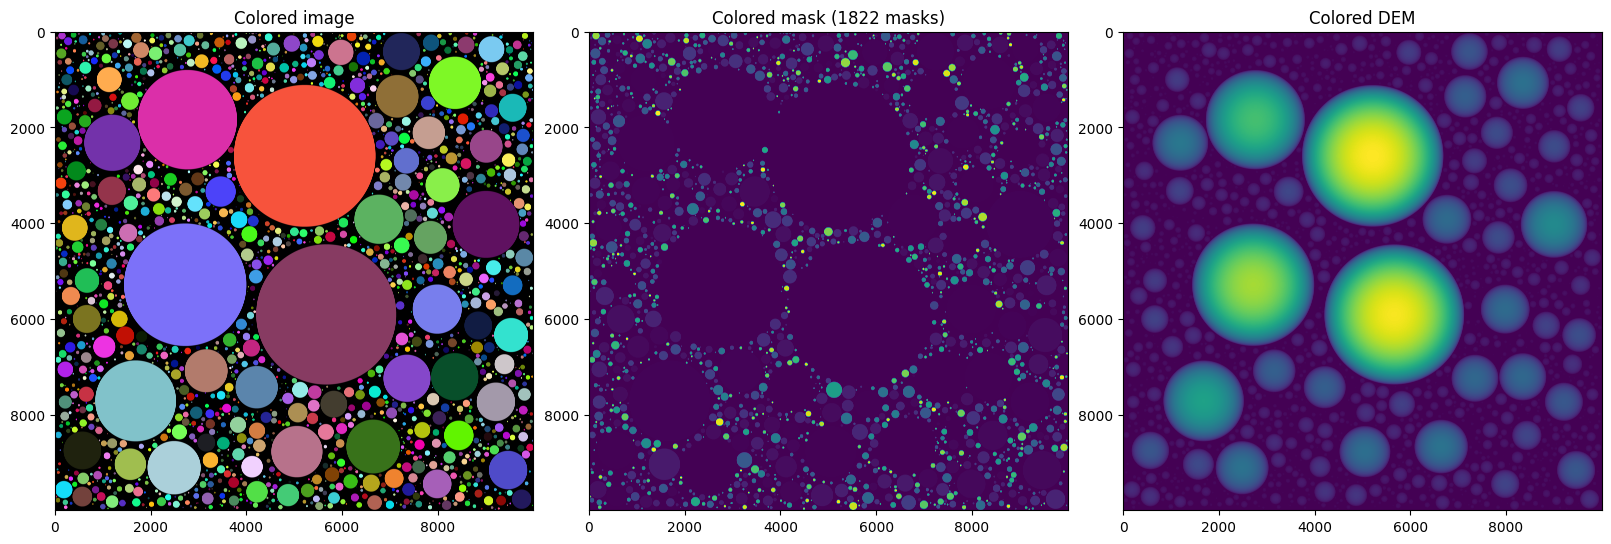

In [6]:
colored_img_fname = os.path.join(Dir, 'img.npy')
colored_img = np.load(colored_img_fname)
colored_msk_fname = os.path.join(Dir, 'msk.npy')
colored_msk = np.load(colored_msk_fname)
colored_dem_fname = os.path.join(Dir, 'dem.npy')
colored_dem = np.load(colored_dem_fname)

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16,9),
                        layout="constrained")
ax[0].imshow(colored_img)
ax[0].set_title('Colored image')
ax[1].imshow(colored_msk)
ax[1].set_title('Colored mask (%d masks)'%(len(np.unique(colored_msk)) - 1))
ax[2].imshow(colored_dem)
ax[2].set_title('Colored DEM')
fig.savefig('Colored_synthetic_pebbles_0010_3000_bw.png', dpi=300)

In [9]:
# generate synthetic images with noise with existing baseline image
baseline_Dir=os.path.join(config['DataDIR'],'synthetic','synthetic_0010_3000_cl')
Dir=os.path.join(config['DataDIR'],'synthetic','synthetic_0010_3000_cl_noise_192')
noise_image_generator(baseline_Dir=baseline_Dir, Dir=Dir, min_radi=10, max_radi=3000
                      , image_size=10000, num_circles=5000, max_attempts=100
                      , overlap=False, ran_color=True, generate_dem=True
                      , std=192)

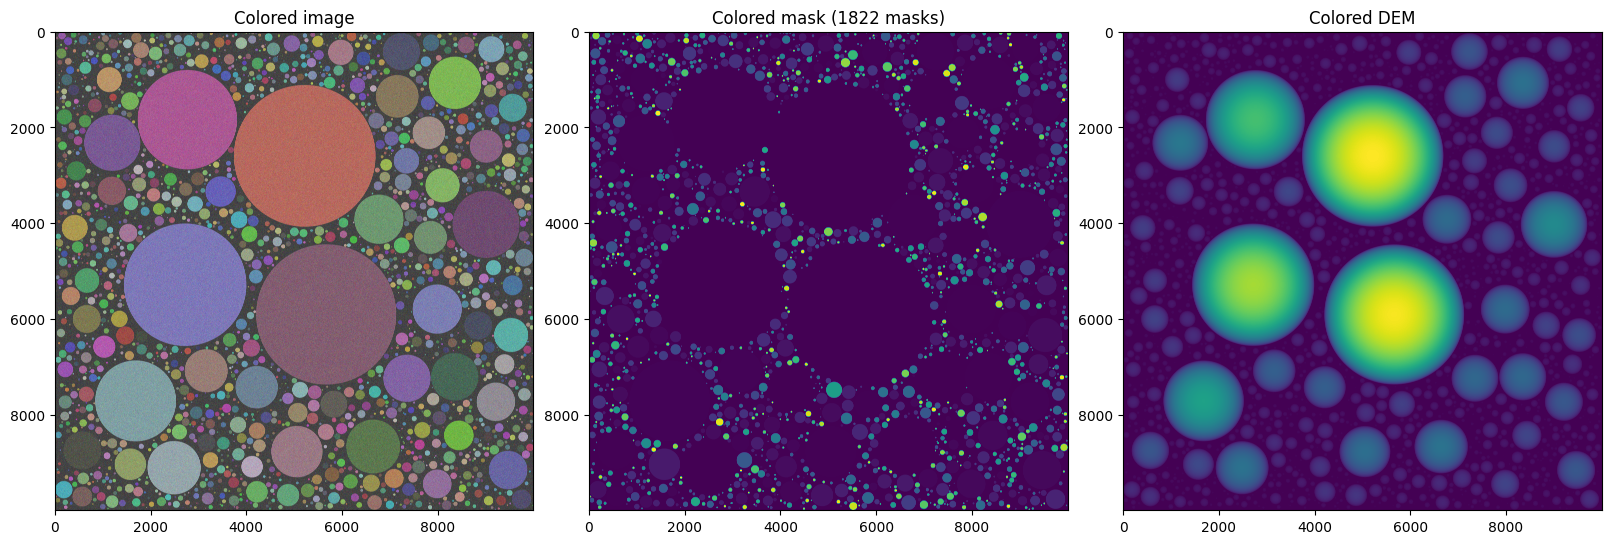

In [10]:
colored_img_fname = os.path.join(Dir, 'img.npy')
colored_img = np.load(colored_img_fname)
colored_msk_fname = os.path.join(Dir, 'msk.npy')
colored_msk = np.load(colored_msk_fname)
colored_dem_fname = os.path.join(Dir, 'dem.npy')
colored_dem = np.load(colored_dem_fname)

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16,9),
                        layout="constrained")
ax[0].imshow(colored_img)
ax[0].set_title('Colored image')
ax[1].imshow(colored_msk)
ax[1].set_title('Colored mask (%d masks)'%(len(np.unique(colored_msk)) - 1))
ax[2].imshow(colored_dem)
ax[2].set_title('Colored DEM')
fig.savefig('Colored_synthetic_pebbles_0010_3000_with_noise.png', dpi=300)

## Generate a synthetic pebble image with shadows

We set the radii between 50 and 3000 pixels

In [11]:
# generate synthetic images with shadows without an existing baseline image
Dir=os.path.join(config['DataDIR'], 'synthetic', 'synthetic_0010_3000_cl_shadow_0_45')
shadow_image_generator(Dir=Dir, min_radi=10, max_radi=3000
                       , image_size=10000, num_circles=5000, max_attempts=100
                       , overlap=False, ran_color=True, generate_dem=True
                       , azimuth=0, inclination=45)

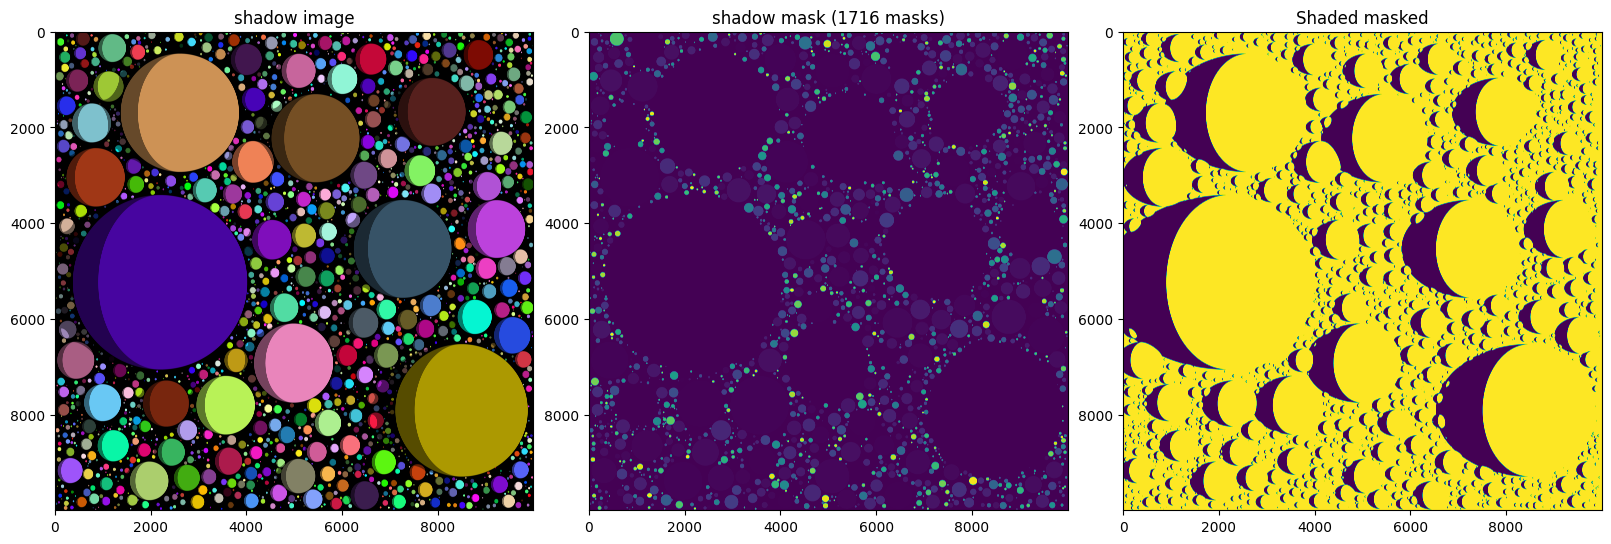

In [12]:
shadow_img_fname = os.path.join(Dir, 'img.npy')
shadow_img = np.load(shadow_img_fname)
shadow_msk_fname = os.path.join(Dir, 'msk.npy')
shadow_msk = np.load(shadow_msk_fname)
shadow_dem_fname = os.path.join(Dir, 'shd.npy')
shadow_dem = np.load(shadow_dem_fname)

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16,9),
                        layout="constrained")
ax[0].imshow(shadow_img)
ax[0].set_title('shadow image')
ax[1].imshow(shadow_msk)
ax[1].set_title('shadow mask (%d masks)'%(len(np.unique(shadow_msk)) - 1))
ax[2].imshow(shadow_dem)
ax[2].set_title('Shaded masked')
fig.savefig('Shadow_Colored_synthetic_pebbles_0010_3000_bw.png', dpi=300)

# Run OrthoSAM segmentation on the shadow pebble image

2025-08-20 12:38:49,481 - INFO - ---------------
2025-08-20 12:38:49,481 - INFO - Layer 0
2025-08-20 12:38:49,481 - INFO - 	Segment tiles
2025-08-20 12:38:49,482 - INFO - 	Loaded parameters from json
2025-08-20 12:38:49,482 - INFO - {'MODEL_TYPE': 'vit_h', 'CheckpointDIR': '/home/bodo/OrthoSAM/MetaSAM', 'DataDIR': '/home/bodo/OrthoSAM/data', 'BaseDIR': '/home/bodo/OrthoSAM', 'MainOutDIR': '/home/bodo/OrthoSAM/output', 'OutDIR': '/home/bodo/OrthoSAM/output/synthetic_0010_3000_cl_shadow_0_45', 'DatasetName': 'synthetic/synthetic_0010_3000_cl_shadow_0_45', 'fid': 'img.npy', 'resolution(mm)': 1, 'tile_size': 1024, 'tile_overlap': 200, 'resample_factor': 0.5, 'input_point_per_axis': 30, 'dilation_size': 5, 'stability_t': 0.85, 'expected_min_size(sqmm)': 50, 'min_radius': 0, 'Calculate_stats': True, 'Discord_notification': False, 'Plotting': True, '1st_resample_factor': 0.5}
2025-08-20 12:38:49,482 - INFO - 	Minimum expected size: 25.0 pixel
2025-08-20 12:38:49,482 - INFO - 	Loaded preproces

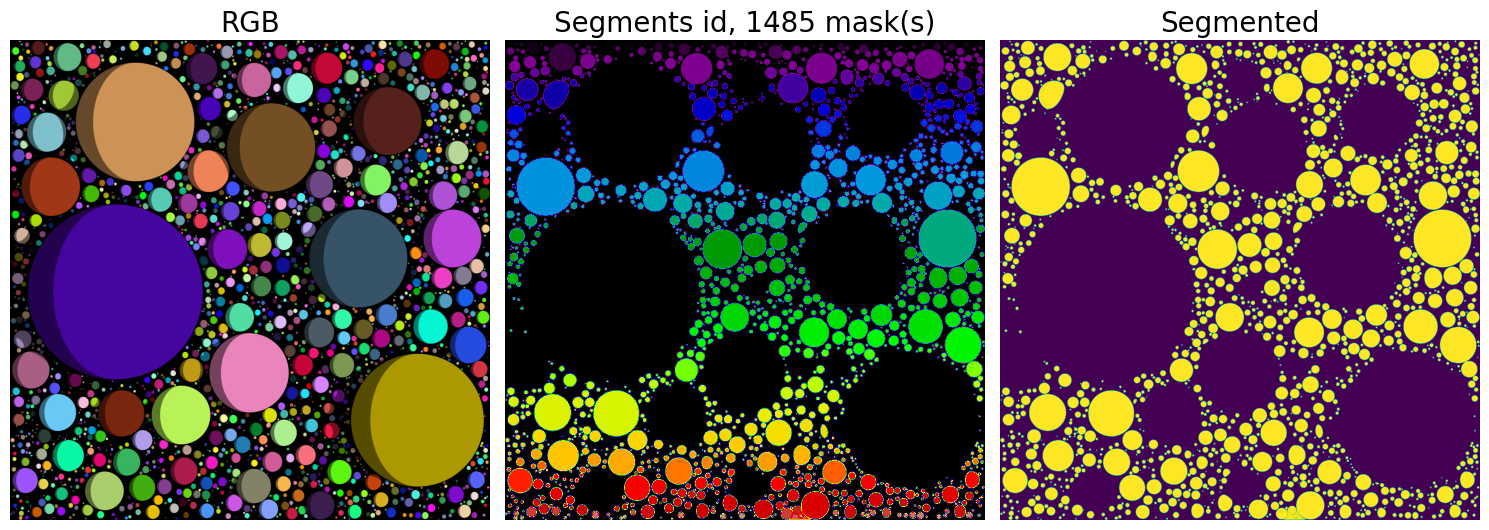

2025-08-20 12:58:32,677 - INFO - 	script took: 51.08 seconds
2025-08-20 12:58:32,678 - INFO - 	Merging completed.
2025-08-20 12:58:32,679 - INFO - ---------------
2025-08-20 12:58:32,680 - INFO - ---------------
2025-08-20 12:58:32,681 - INFO - Layer 1
2025-08-20 12:58:32,681 - INFO - 	Loaded parameters from /home/bodo/OrthoSAM/output/synthetic_0010_3000_cl_shadow_0_45
2025-08-20 12:58:32,682 - INFO - {'MODEL_TYPE': 'vit_h', 'CheckpointDIR': '/home/bodo/OrthoSAM/MetaSAM', 'DataDIR': '/home/bodo/OrthoSAM/data', 'BaseDIR': '/home/bodo/OrthoSAM', 'MainOutDIR': '/home/bodo/OrthoSAM/output', 'OutDIR': '/home/bodo/OrthoSAM/output/synthetic_0010_3000_cl_shadow_0_45', 'DatasetName': 'synthetic/synthetic_0010_3000_cl_shadow_0_45', 'fid': 'img.npy', 'resolution(mm)': 1, 'tile_size': 1024, 'tile_overlap': 200, 'resample_factor': 0.25, 'input_point_per_axis': 30, 'dilation_size': 5, 'stability_t': 0.85, 'expected_min_size(sqmm)': 50, 'min_radius': 0, 'Calculate_stats': True, 'Discord_notification'

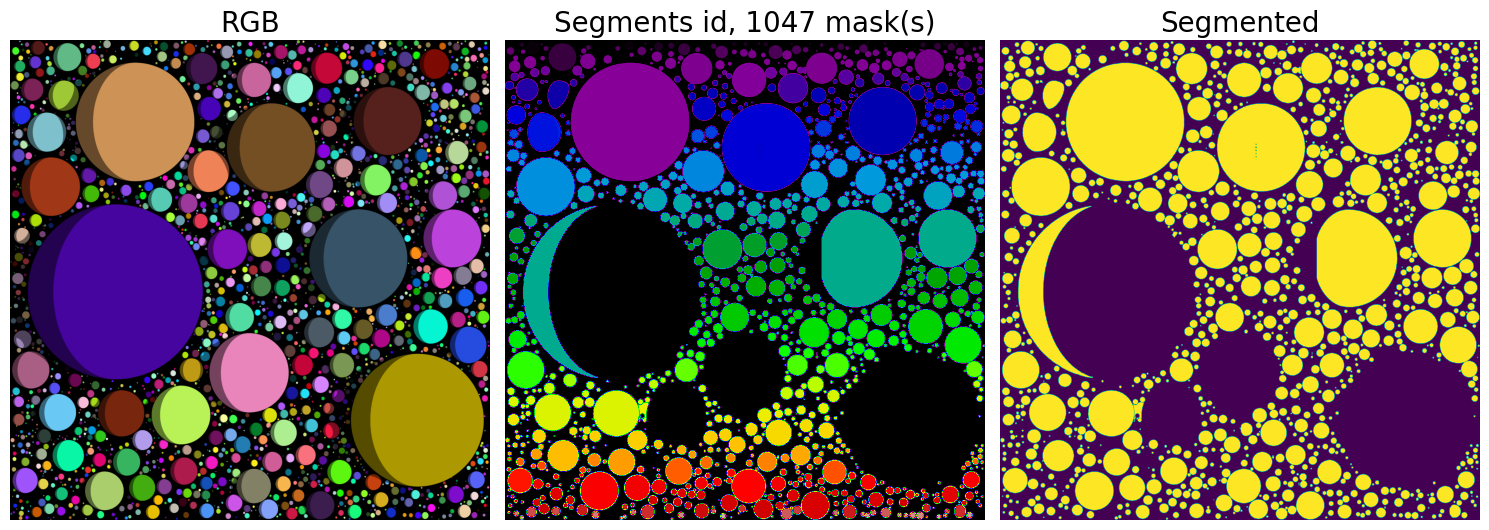

2025-08-20 13:02:54,954 - INFO - 	script took: 10.66 seconds
2025-08-20 13:02:54,955 - INFO - 	Merging completed.
2025-08-20 13:02:54,956 - INFO - ---------------
2025-08-20 13:02:55,348 - INFO - 
2025-08-20 13:02:55,348 - INFO -   0%|          | 0/1047 [00:00<?, ?id/s]
2025-08-20 13:02:55,352 - INFO - 
2025-08-20 13:02:55,352 - INFO - 100%|##########| 1047/1047 [00:00<00:00, 348057.09id/s]
2025-08-20 13:02:55,450 - INFO - 	Layer 001 discovered 93 new mask(s)
2025-08-20 13:02:56,916 - INFO - 
2025-08-20 13:02:56,917 - INFO -   0%|          | 0/1577 [00:00<?, ?it/s]
2025-08-20 13:02:57,036 - INFO - 
2025-08-20 13:02:57,036 - INFO -   1%|          | 8/1577 [00:00<00:20, 76.41it/s]
2025-08-20 13:02:57,142 - INFO - 
2025-08-20 13:02:57,143 - INFO -   1%|1         | 16/1577 [00:00<00:20, 75.72it/s]
2025-08-20 13:02:57,261 - INFO - 
2025-08-20 13:02:57,261 - INFO -   2%|1         | 24/1577 [00:00<00:21, 71.74it/s]
2025-08-20 13:02:57,373 - INFO - 
2025-08-20 13:02:57,374 - INFO -   2%|2     

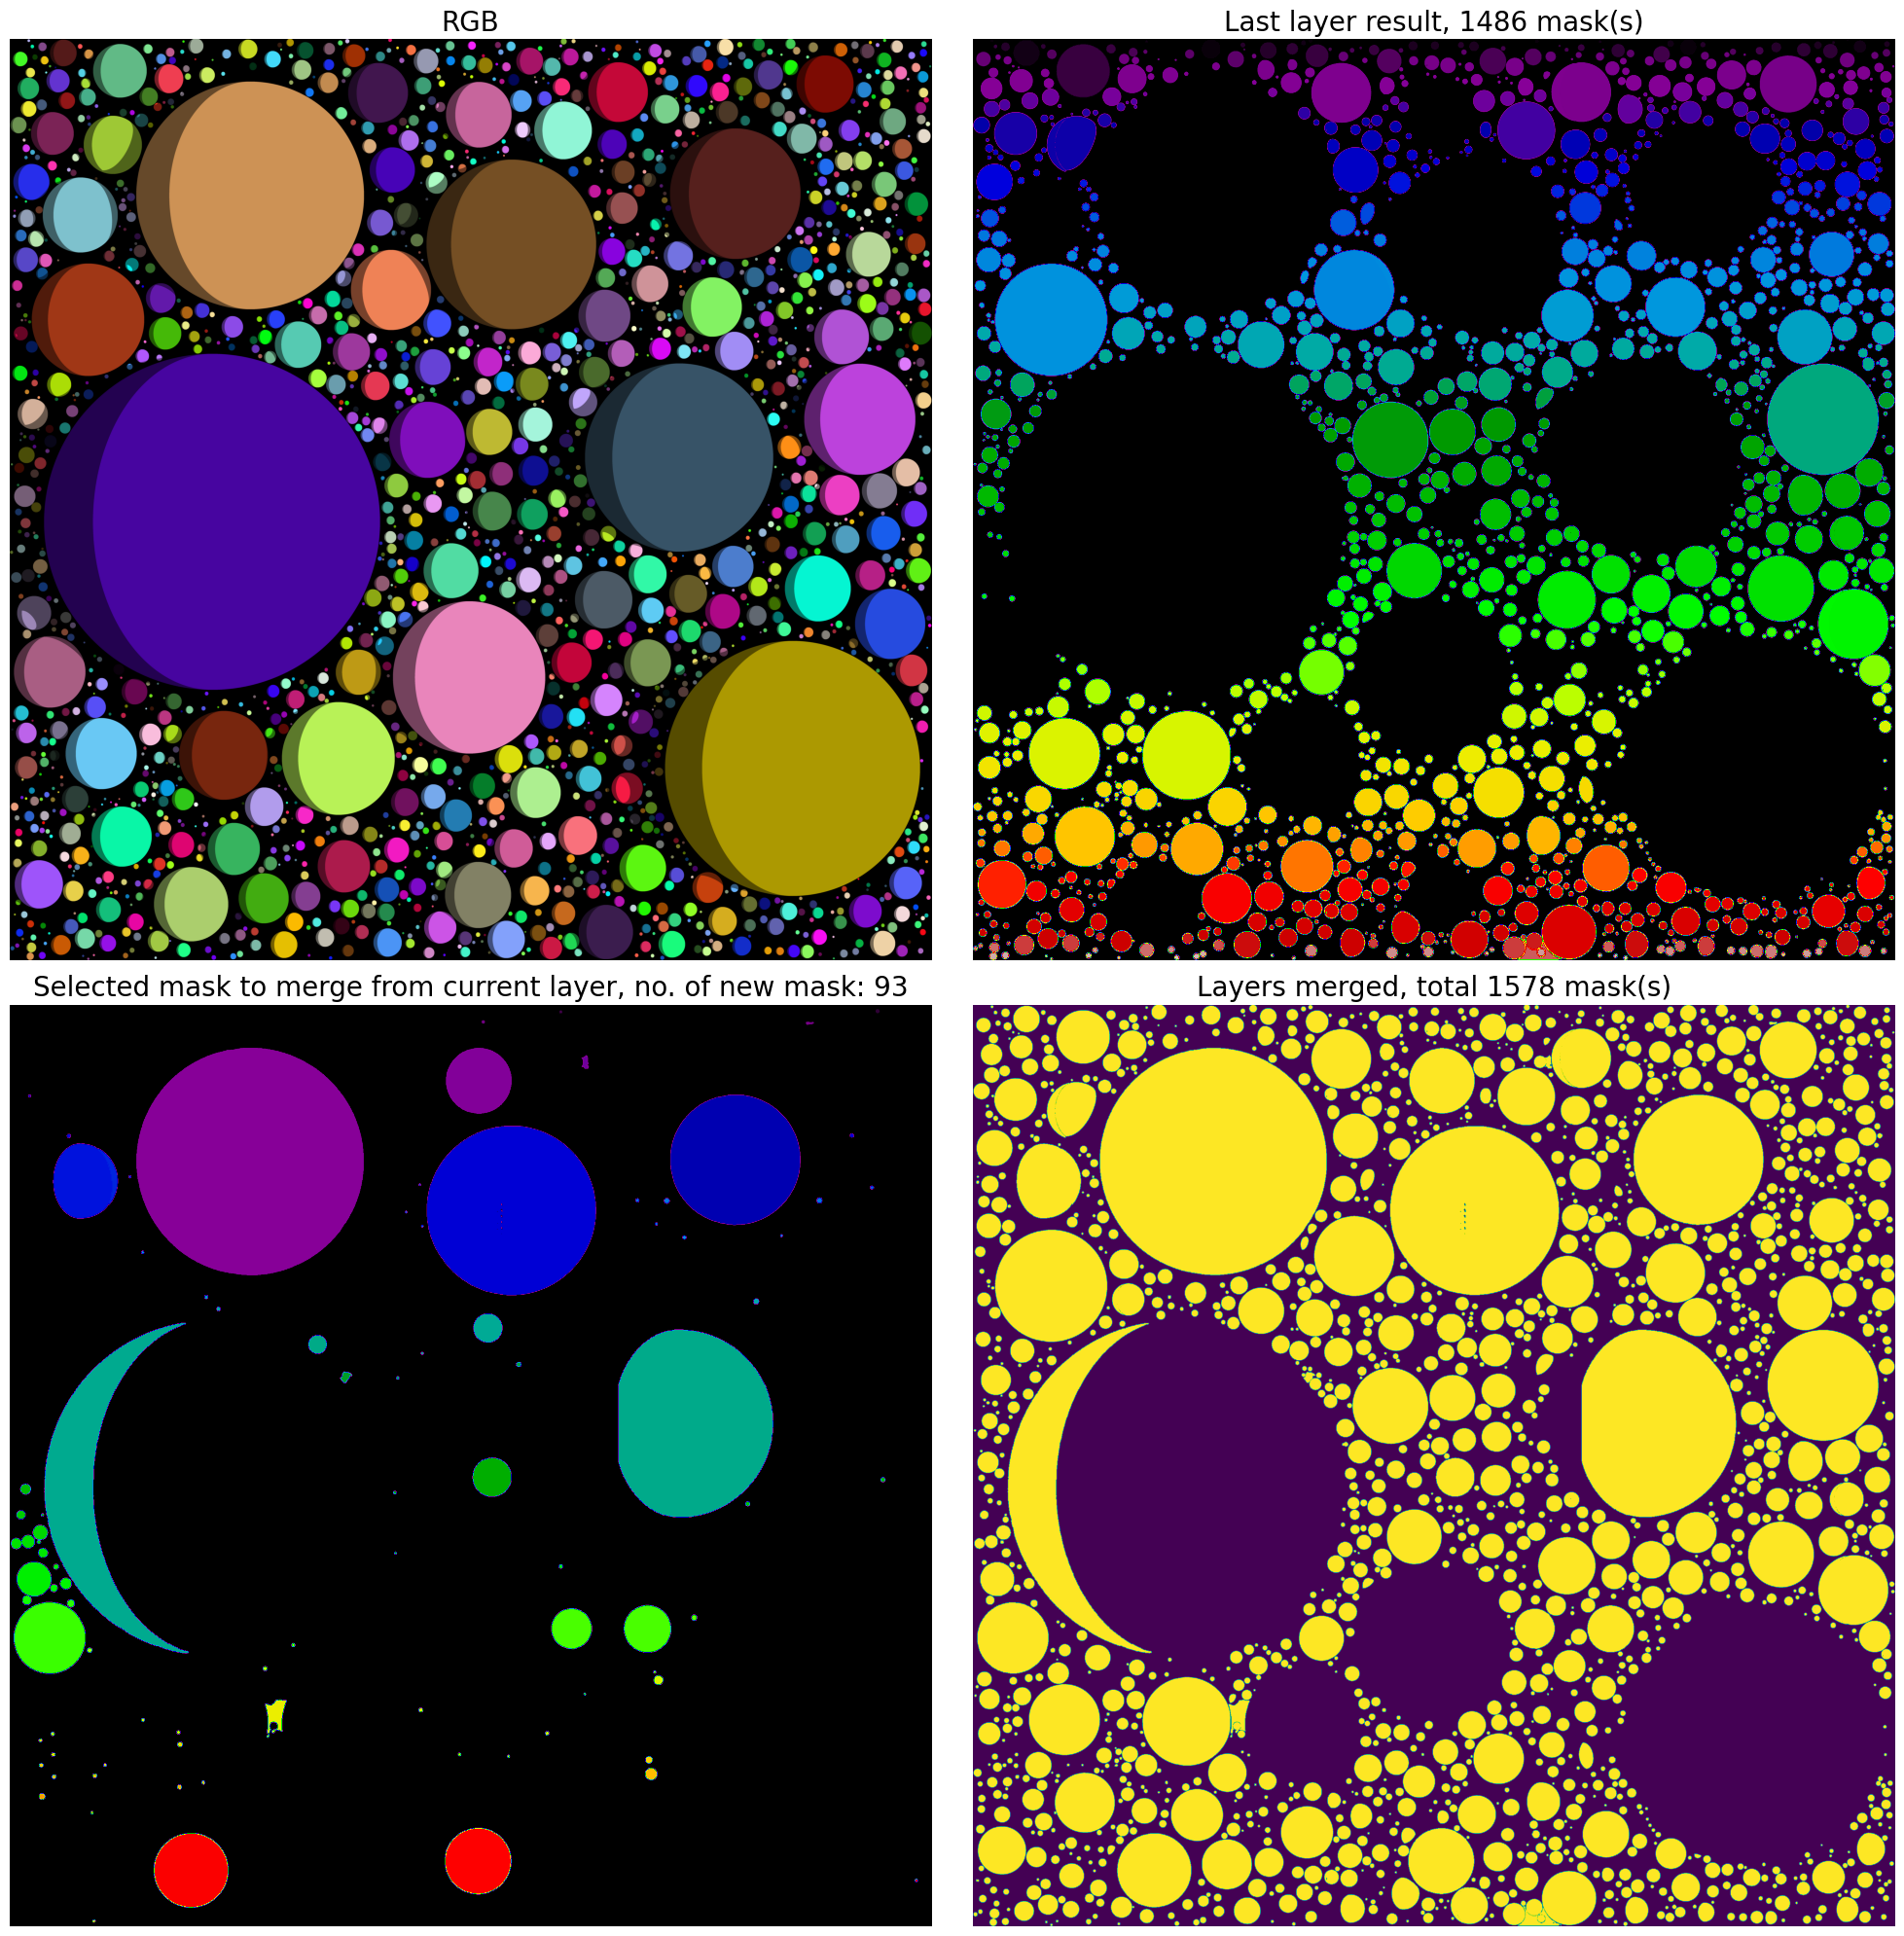

2025-08-20 13:03:27,944 - INFO - 	Saving id mask to /home/bodo/OrthoSAM/output/synthetic_0010_3000_cl_shadow_0_45/Merged/Merged_Layers_001.npy...
2025-08-20 13:03:28,035 - INFO - 	Saved
2025-08-20 13:03:28,036 - INFO - 	script took: 295.36 seconds
2025-08-20 13:03:28,037 - INFO - 	Output saved to /home/bodo/OrthoSAM/output/synthetic_0010_3000_cl_shadow_0_45
2025-08-20 13:03:28,037 - INFO - ---------------
2025-08-20 13:03:28,039 - INFO - Run took: 24.64 minutes
2025-08-20 13:03:28,039 - INFO - Calculating statistics...
2025-08-20 13:03:28,151 - INFO - /home/bodo/OrthoSAM/data/synthetic/synthetic_0010_3000_cl_shadow_0_45/img.npy imported
2025-08-20 13:03:28,211 - INFO - /home/bodo/OrthoSAM/output/synthetic_0010_3000_cl_shadow_0_45/Merged/Merged_Layers_001.npy imported
2025-08-20 13:03:34,318 - INFO - Statistics saved to props.csv


In [14]:
#segmentation
main_para={'OutDIR': os.path.join(config['BaseDIR'],'output','synthetic_0010_3000_cl_shadow_0_45'),# where output will be stored
        'DatasetName': 'synthetic/synthetic_0010_3000_cl_shadow_0_45',
        'fid': 'img.npy',#Filename or the index after sorting by file name.
        'resolution(mm)': 1,#image resolution in mm/pixel
        'tile_size': 1024,
        'tile_overlap':200,
        'resample_factor': 1/2,#'Auto': auto select resample rate.
        'input_point_per_axis': 30,
        'dilation_size':5,
        'stability_t':0.85,
        'expected_min_size(sqmm)': 50,
        'min_radius': 0,
        'Calculate_stats': True,
        'Discord_notification': False,# True: send discord when finished.
        'Plotting': True# True: plot the results
        }
#specify for individual layers. e.g. different point_per_side
passes_para_list=[
    {'resample_factor':0.25, #'Auto': auto select resample rate.
        }
    ]
#parameters for preprocessing. If no preprocessing is needed, leave empty or remove it.
pre_para_list=[{#'Gaussian': {'kernel size':3},
                #'CLAHE':{'clip limit':2},
                #'Downsample': {'fxy':4},
                #'Buffering': {'crop size': crop_size}
            },{},{}]

#If no preprocessing is needed, remove pre_para_list or use None.
passes_para_list=setup(main_para, passes_para_list, pre_para_list)

orthosam(passes_para_list)

In [17]:
#assessment of synthetic images
from synthetic_assessment import accuracy
segmentation_output_Dir=os.path.join(config['BaseDIR'],'output','synthetic_0010_3000_cl_shadow_0_45')
accuracy(segmentation_output_Dir, shadow=True)

resampled to:  (5000, 5000, 3)
Mask imported from /home/bodo/OrthoSAM/output/synthetic_0010_3000_cl_shadow_0_45/Merged/Merged_Layers_001.npy
masks size: (5000, 5000)
1578  mask(s) loaded
No. of actual objects: 1716
Mean mask IoU: 
0.8649754862558738
